In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
import matplotlib.pyplot as plt

# If using GPU, TensorFlow will allocate memory on demand.
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)  # Enable memory growth
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=0.8 * 1024)]
            )
    except RuntimeError as e:
        print(e)
# import numpy as np
# import tensorflow as tf
# config = tf.compat.v1.ConfigProto(gpu_options =
#                          tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
# # device_count = {'GPU': 1}
# )
# config.gpu_options.allow_growth = True
# session = tf.compat.v1.Session(config=config)
# tf.compat.v1.keras.backend.set_session(session)
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.activations import linear, relu, sigmoid
# import matplotlib.pyplot as plt

In [ ]:
#load the train data
X = np.load("/content/drive/MyDrive/digit/data/handsignX.npy")
y = np.load("/content/drive/MyDrive/digit/data/handsigny.npy")
print ('The first element of X is: ', X[0])
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The first element of X is:  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+

In [ ]:
import os
from PIL import Image
import numpy as np

# Load the test data
test_file = '/content/drive/MyDrive/digit/Tests'
test_images = []
y_test = []

# List all files in the directory
print(f"Files in directory {test_file}:")
print(os.listdir(test_file))  # Print out all filenames to ensure they are correctly detected

# Iterate through the subdirectories in the directory
for subfolder in os.listdir(test_file):
    subfolder_path = os.path.join(test_file, subfolder)

    # Check if it's a directory
    if os.path.isdir(subfolder_path):
        print(f"Found directory: {subfolder_path}")

        # Iterate through the files in the subdirectory
        for filename in os.listdir(subfolder_path):
            file_path = os.path.join(subfolder_path, filename)

            # Check if it's a file and has a valid image extension
            if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
                try:
                    img = Image.open(file_path).convert('L')  # Convert image to grayscale
                    img = img.resize((28, 28))  # Resize to 28x28
                    test_images.append(np.array(img))  # Append the image array to the list

                    # Extract the label from the subfolder name (assuming it's a digit in the filename)
                    label = int(subfolder)  # Assuming subfolder name is the label
                    y_test.append(label)

                    # Debugging: Print the filename and shape of the processed image
                    print(f"Processed: {filename} from {subfolder}, Image shape: {img.size}, Label: {label}")
                except Exception as e:
                    print(f"Error processing {filename}: {e}")
            else:
                print(f"Skipping non-image or invalid file: {filename}")

# Convert the lists to numpy arrays
x_test = np.array(test_images)
y_test = np.array(y_test)

# Debugging: Print the final shapes of x_test and y_test
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")



Files in directory /content/drive/MyDrive/digit/Tests:
['5', '9', '1', '6', '7', '3', '8', '0', '2', '4']
Found directory: /content/drive/MyDrive/digit/Tests/5
Processed: WhatsApp Image 2024-10-15 at 10.53.47 PM (1).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.48 PM (3).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.53 PM (1).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.45 PM (2).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.46 PM.jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.46 PM (3).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.47 PM.jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 10.53.52 PM (2).jpeg from 5, Image shape: (28, 28), Label: 5
Processed: WhatsApp Image 2024-10-15 at 

In [ ]:
x_test.shape


(200, 28, 28)

In [ ]:
y_test.shape

(200,)

In [ ]:
#define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(400,)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

#compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60,234 (235.29 KB)

 Trainable params: 60,234 (235.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train the model
print("Original shape of X:", X.shape)

X_reshaped = X.reshape(-1, 20, 20)
print("Shape of X after reshaping to (5000, 28, 28):", X_reshaped.shape)

# Flatten X to (5000, 784)
X_flattened = X_reshaped.reshape(-1, 400)
print("Shape of X after flattening to (5000, 400):", X_flattened.shape)



Original shape of X: (5000, 400)
Shape of X after reshaping to (5000, 28, 28): (5000, 20, 20)
Shape of X after flattening to (5000, 400): (5000, 400)


In [ ]:
t_model = model.fit(X_flattened, y, epochs=10, validation_split=0.2)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6413 - loss: 1.3157 - val_accuracy: 0.0000e+00 - val_loss: 9.3512
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9363 - loss: 0.2252 - val_accuracy: 0.0000e+00 - val_loss: 10.6568
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9608 - loss: 0.1426 - val_accuracy: 0.0000e+00 - val_loss: 10.9776
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9673 - loss: 0.1148 - val_accuracy: 0.0000e+00 - val_loss: 11.6341
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9784 - loss: 0.0803 - val_accuracy: 0.0000e+00 - val_loss: 11.8249
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9873 - loss: 0.0572 - val_accuracy: 0.0000e+00 - val_loss: 12.2736
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9860 - loss: 0.0489 - val_accuracy: 0.0000e+00 - val_loss: 12.2499
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9915

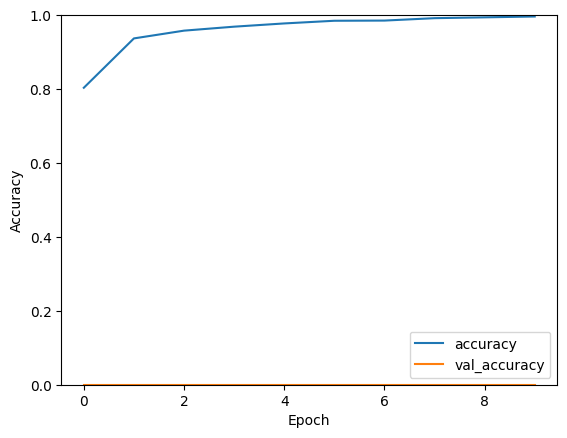

In [ ]:
#plot train accuracy
plt.plot(t_model.history['accuracy'], label='accuracy')
plt.plot(t_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [ ]:
print("Original shape of X:", x_test.shape)


x_test_reshaped = x_test.reshape(-1, 20, 20)
print("Shape of X after reshaping to (200, 28, 28):", x_test_reshaped.shape)

# Flatten X to (5000, 784)
x_test_flattened = x_test_reshaped.reshape(-1, 400)
print("Shape of X after flattening to (5000, 400):", x_test_flattened.shape)

Original shape of X: (200, 28, 28)
Shape of X after reshaping to (200, 28, 28): (392, 20, 20)
Shape of X after flattening to (5000, 400): (392, 400)


In [ ]:
x_test_flattened = x_test_flattened[:200]
test_loss, test_accuracy = model.evaluate(x_test_flattened, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0732 - loss: 5870.4668      
Test Loss: 6213.92431640625
Test Accuracy: 0.10000000149011612


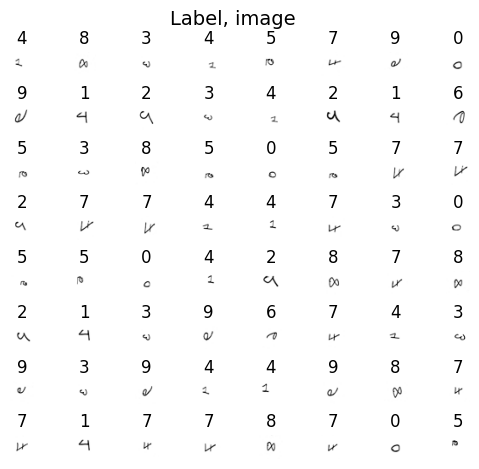

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


m, _, n = x_test.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)

for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)

    # Select rows corresponding to the random indices and
    # reshape the image
    x_test_random_reshaped = x_test[random_index].reshape((28,28)).T

    # Display the image
    ax.imshow(x_test_random_reshaped, cmap='gray')

    # Display the label above the image
    ax.set_title(y_test[random_index])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)